# **INCOME PREDICTION**

The Income prediction project aims to leverage machine learning algorithms and statistical analysis to predict the income level of adults based on various demographic, social, and economic factors.

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/income_evaluation_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num     28
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week    36
native-country     0
income             0
dtype: int64

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income             object
dtype: object

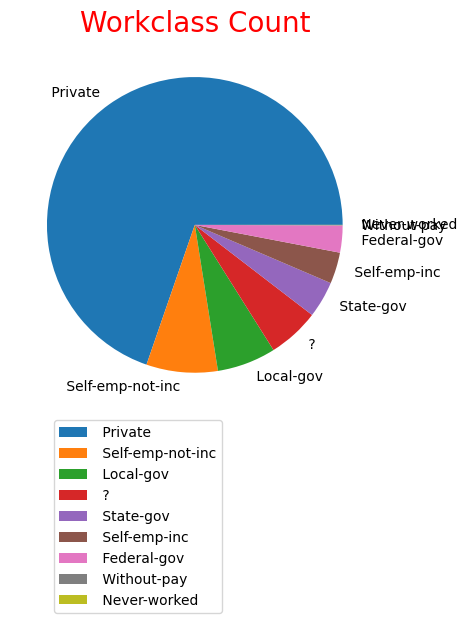

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
wrk=df['workclass'].value_counts()
plt.pie(wrk,labels=wrk.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.01))
plt.title('Workclass Count',size=20,color='red')
plt.show()
wrk

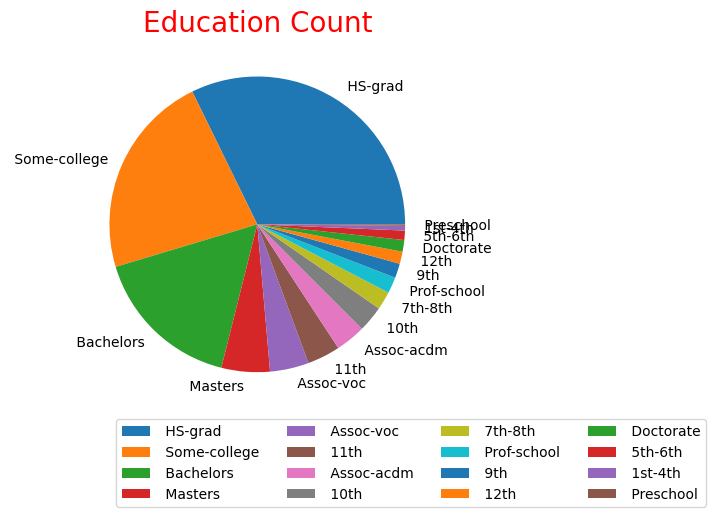

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [ ]:
edu=df['education'].value_counts()
plt.pie(edu,labels=edu.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.008),ncol=4)
plt.title('Education Count',size=20,color='red')
plt.show()
edu

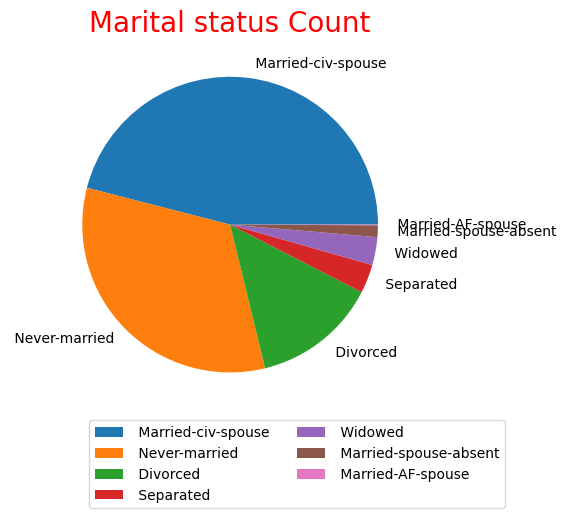

In [ ]:
mar_sts=df['marital-status'].value_counts()
plt.pie(mar_sts,labels=mar_sts.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.01),ncol=2)
plt.title('Marital status Count',size=20,color='red')
plt.show()

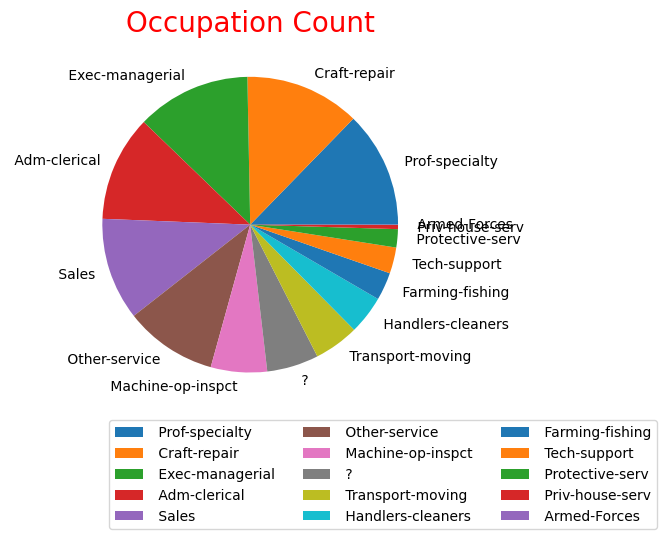

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [ ]:
occ=df['occupation'].value_counts()
plt.pie(occ,labels=occ.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.01),ncol=3)
plt.title('Occupation Count',size=20,color='red')
plt.show()
occ

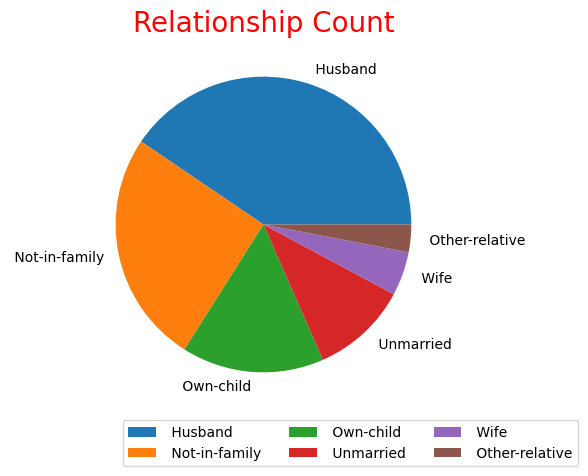

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [ ]:
rel=df['relationship'].value_counts()
plt.pie(rel,labels=rel.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.01),ncol=3)
plt.title('Relationship Count',size=20,color='red')
plt.show()
rel

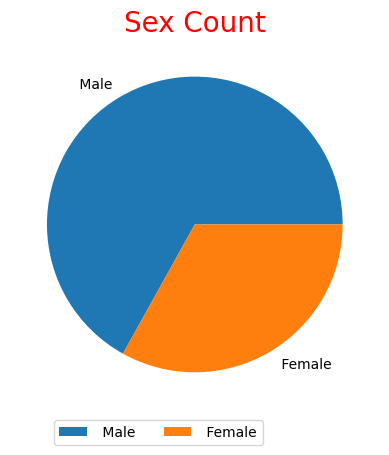

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [ ]:
sex=df['sex'].value_counts()
plt.pie(sex,labels=sex.index)
plt.legend(loc='upper left',bbox_to_anchor=(0.10,-0.01),ncol=3)
plt.title('Sex Count',size=20,color='red')
plt.show()
sex

<Axes: xlabel='income', ylabel='count'>

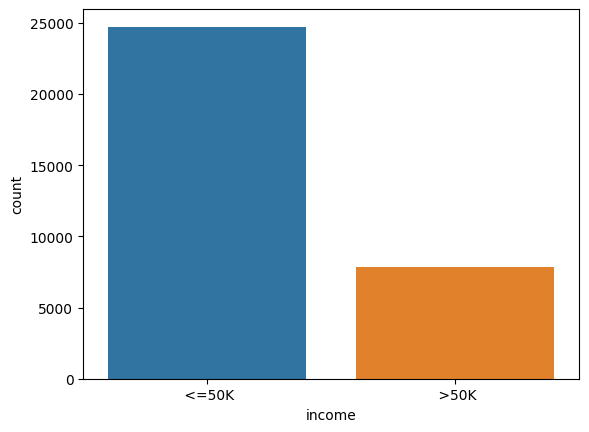

In [ ]:
import seaborn as sns
sns.countplot(x='income',data=df,hue='income')

In [ ]:
import numpy as np
df['workclass']=df['workclass'].str.replace('?','Others')
print(df['workclass'].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Others               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


In [ ]:
df['occupation']=df['occupation'].str.replace('?','Self-Employed')
print(df['occupation'].value_counts())

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Self-Employed        1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64


Replacing Missing Values

In [ ]:
df['education-num']=df['education-num'].fillna(df['education-num'].mode()[0])
df['hours-per-week']=df['hours-per-week'].fillna(df['hours-per-week'].mode()[0])

Encoding using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['workclass']=enc.fit_transform(df['workclass'])
df['education']=enc.fit_transform(df['education'])
df['marital-status']=enc.fit_transform(df['marital-status'])
df['occupation']=enc.fit_transform(df['occupation'])
df['relationship']=enc.fit_transform(df['relationship'])
df['race']=enc.fit_transform(df['race'])
df['sex']=enc.fit_transform(df['sex'])
df['native-country']=enc.fit_transform(df['native-country'])
df['income']=enc.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13.0,4,0,1,4,1,2174,0,40.0,39,0
1,50,6,83311,9,13.0,2,3,0,4,1,0,0,13.0,39,0
2,38,4,215646,11,9.0,0,5,1,4,1,0,0,40.0,39,0
3,53,4,234721,1,7.0,2,5,0,2,1,0,0,40.0,39,0
4,28,4,338409,9,13.0,2,9,5,2,0,0,0,40.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12.0,2,13,5,4,0,0,0,38.0,39,0
32557,40,4,154374,11,9.0,2,6,0,4,1,0,0,40.0,39,1
32558,58,4,151910,11,9.0,6,0,4,4,0,0,0,40.0,39,0
32559,22,4,201490,11,9.0,4,0,3,4,1,0,0,20.0,39,0


In [ ]:
df.dtypes

age                 int64
workclass           int64
fnlwgt              int64
education           int64
education-num     float64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country      int64
income              int64
dtype: object

Correlation

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.008677,-0.076646,-0.010508,0.036041,-0.266288,0.008912,-0.263698,0.028718,0.088832,0.077674,0.057775,0.069157,-0.001151,0.234037
workclass,0.008677,1.000000,-0.018089,0.000978,-0.008981,-0.020966,-0.049258,-0.060702,0.053466,0.076795,0.030571,0.000938,0.059895,-0.011234,0.002212
fnlwgt,-0.076646,-0.018089,1.000000,-0.028145,-0.043128,0.028153,-0.000036,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.000978,-0.028145,1.000000,0.358816,-0.038407,-0.044603,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055264,0.064288,0.079317
education-num,0.036041,-0.008981,-0.043128,0.358816,1.000000,-0.069318,0.049633,-0.094040,0.031949,0.012148,0.122487,0.080123,0.147816,0.050941,0.334561
marital-status,-0.266288,-0.020966,0.028153,-0.038407,-0.069318,1.000000,0.042942,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190348,-0.023819,-0.199307
occupation,0.008912,-0.049258,-0.000036,-0.044603,0.049633,0.042942,1.000000,-0.027036,-0.007743,0.039561,0.012920,0.006376,-0.035731,-0.006411,0.019342
relationship,-0.263698,-0.060702,0.008931,-0.010876,-0.094040,0.185451,-0.027036,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.249114,-0.005507,-0.250918
race,0.028718,0.053466,-0.021291,0.014131,0.031949,-0.068013,-0.007743,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041743,0.137852,0.071846
sex,0.088832,0.076795,0.026858,-0.027356,0.012148,-0.129314,0.039561,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229485,-0.008119,0.215980


Representation of Correlation using Heatmap

<Axes: >

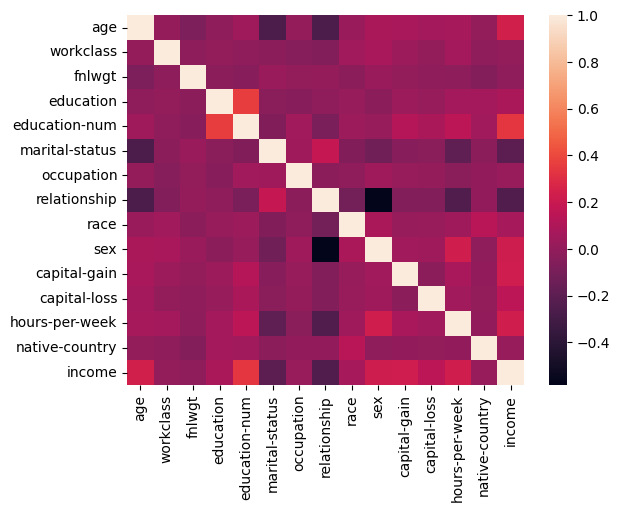

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

Pairplot

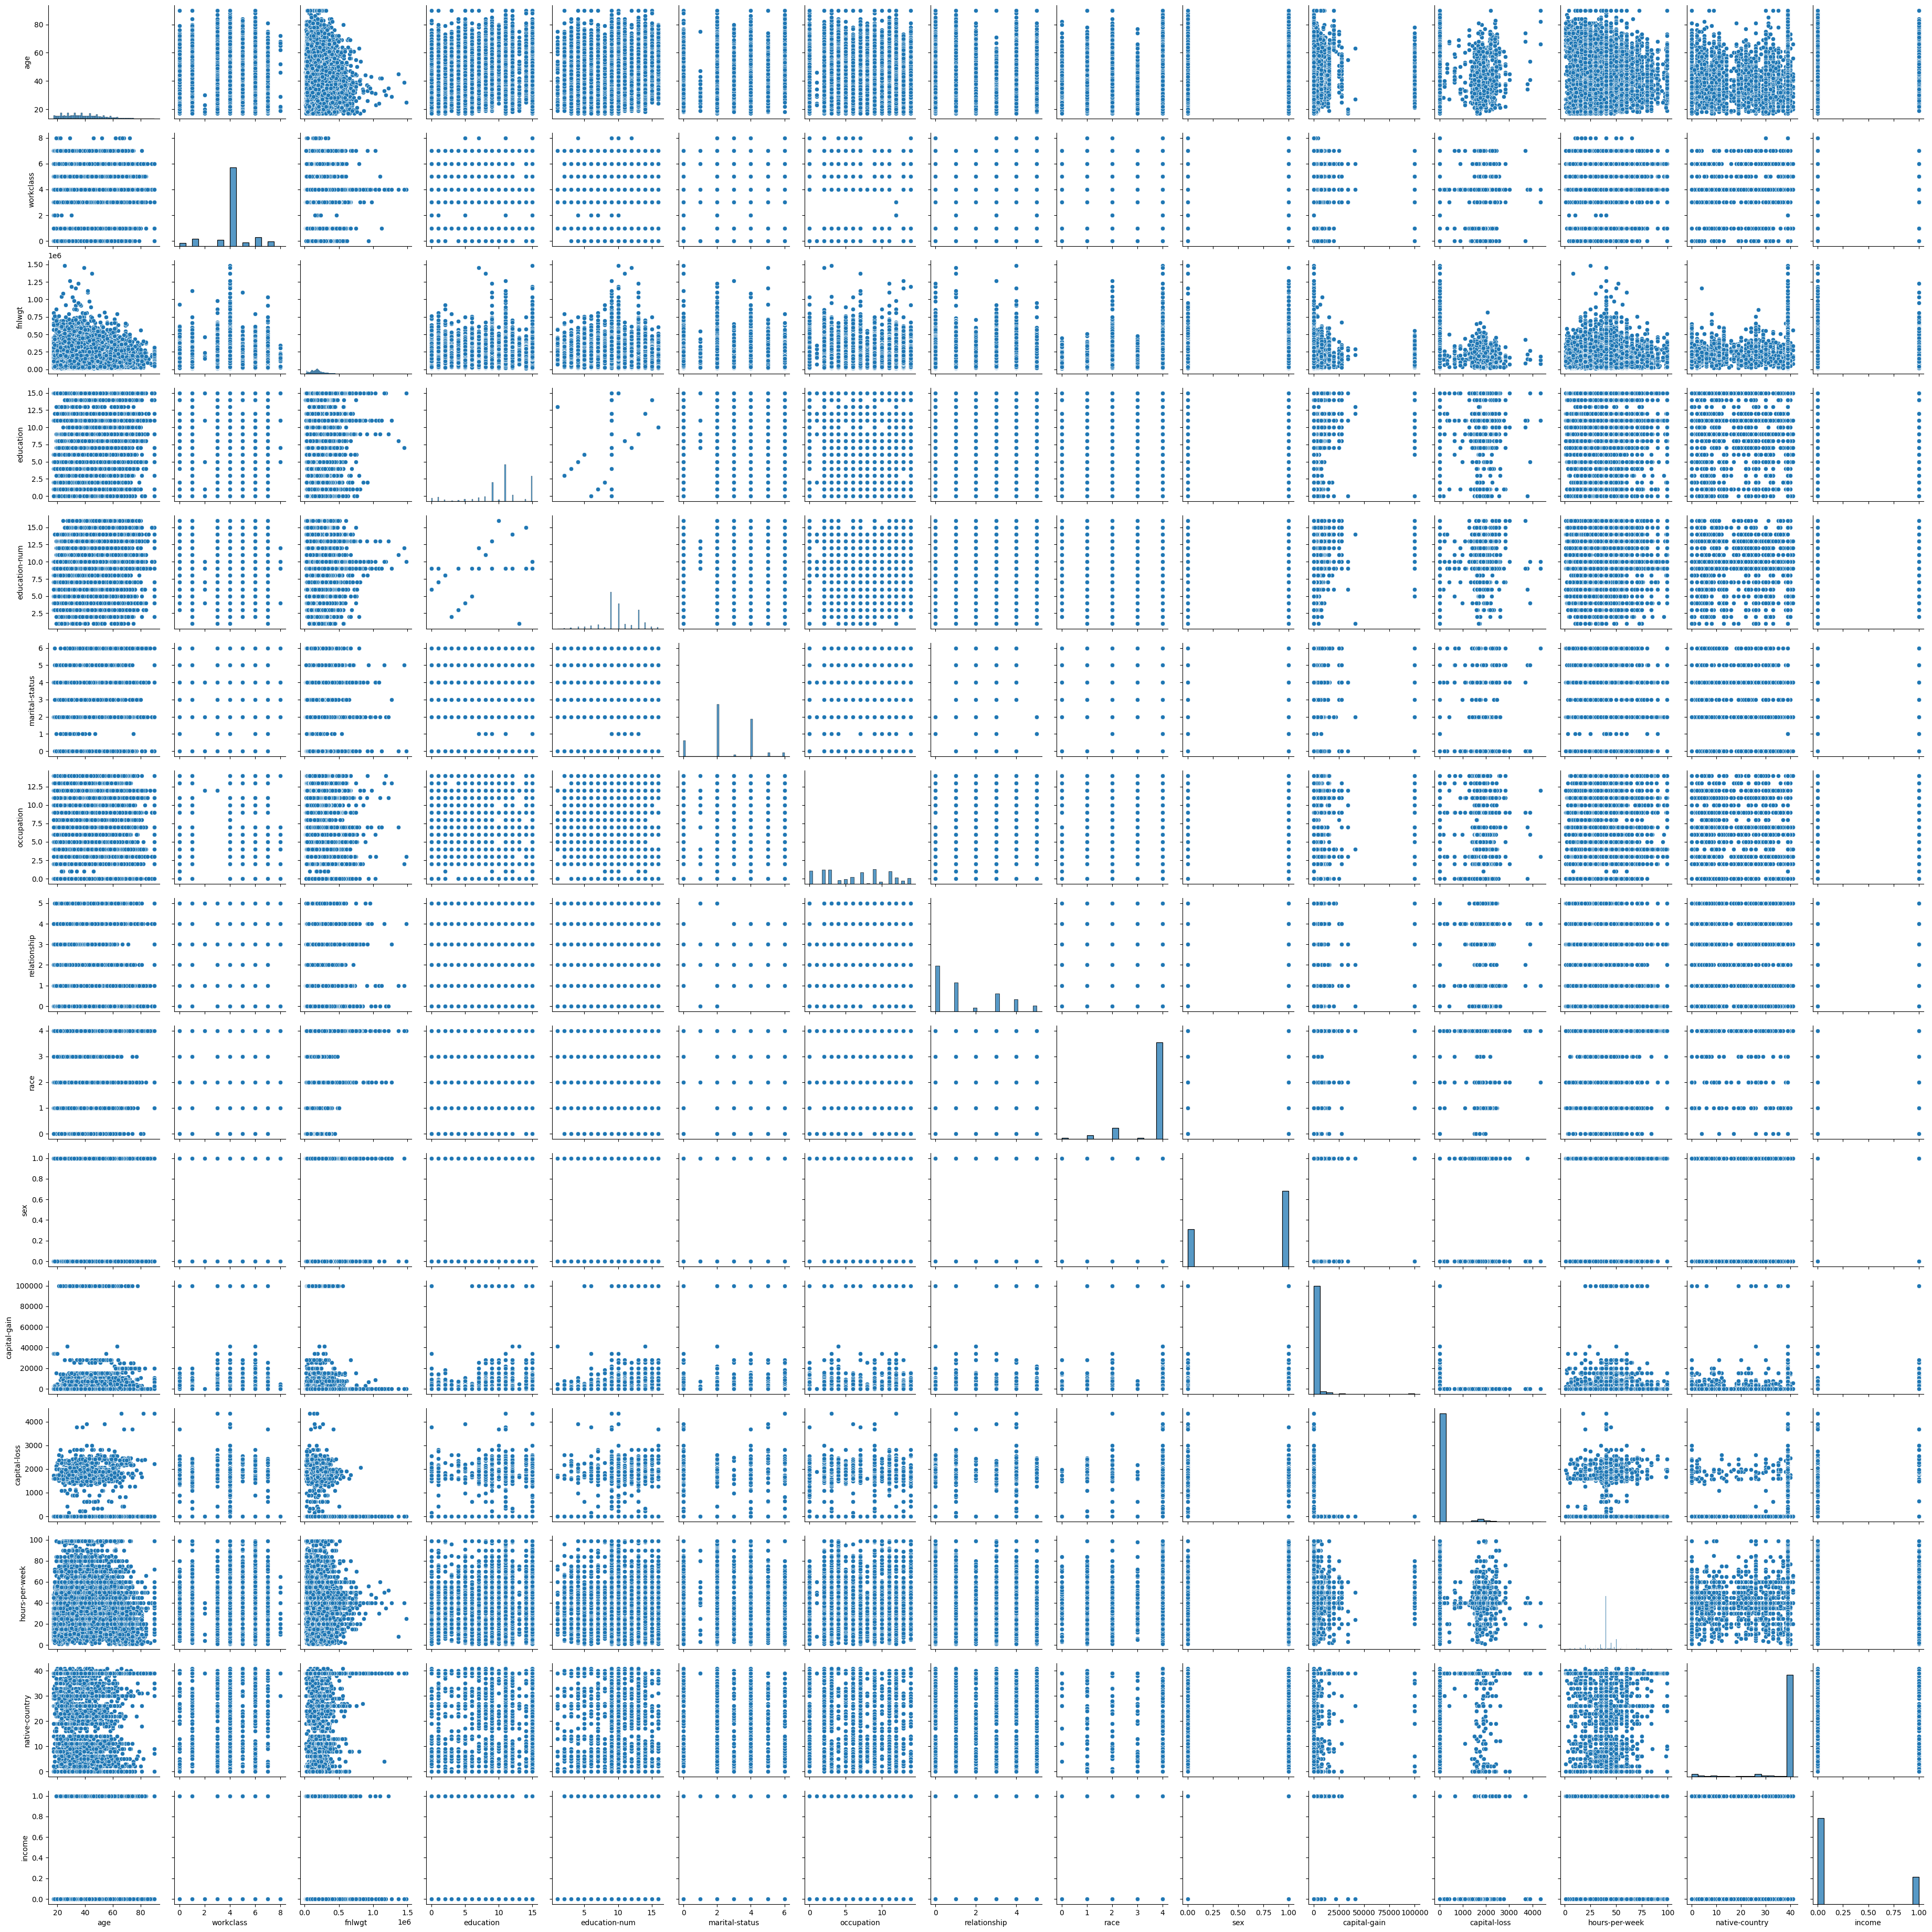

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.iloc[:,:-1]
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13.0,4,0,1,4,1,2174,0,40.0,39
1,50,6,83311,9,13.0,2,3,0,4,1,0,0,13.0,39
2,38,4,215646,11,9.0,0,5,1,4,1,0,0,40.0,39
3,53,4,234721,1,7.0,2,5,0,2,1,0,0,40.0,39
4,28,4,338409,9,13.0,2,9,5,2,0,0,0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12.0,2,13,5,4,0,0,0,38.0,39
32557,40,4,154374,11,9.0,2,6,0,4,1,0,0,40.0,39
32558,58,4,151910,11,9.0,6,0,4,4,0,0,0,40.0,39
32559,22,4,201490,11,9.0,4,0,3,4,1,0,0,20.0,39


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

Feature Selection using Mutual Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
fs=mutual_info_classif(x,y)
fs= pd.Series(fs)
fs.index=x.columns
fs.sort_values(ascending=False)

relationship      0.116599
marital-status    0.110424
capital-gain      0.081122
age               0.067850
education         0.067663
education-num     0.066790
occupation        0.066093
hours-per-week    0.036001
capital-loss      0.034556
fnlwgt            0.033725
sex               0.026237
workclass         0.018078
native-country    0.009852
race              0.007824
dtype: float64

Bar chart representing the dependency

<Axes: >

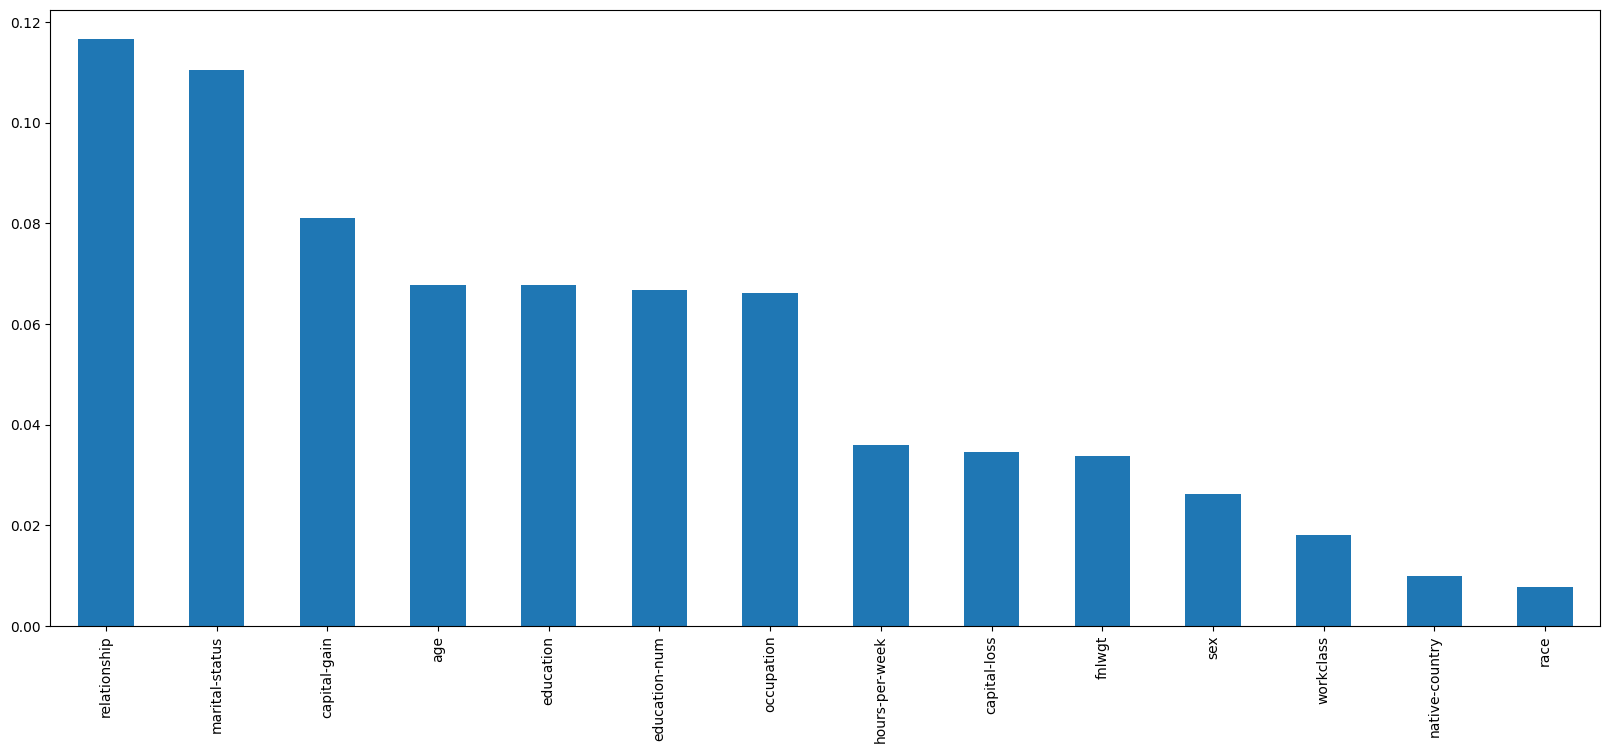

In [ ]:
fs.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Selecting best features using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_kbst=SelectKBest(mutual_info_classif,k=12)
sel_kbst.fit(x,y)
x.columns[sel_kbst.get_support()]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

Dropping less important features

In [ ]:
df.drop(['race','native-country'],axis=1,inplace=True)

Boxplot

<Axes: >

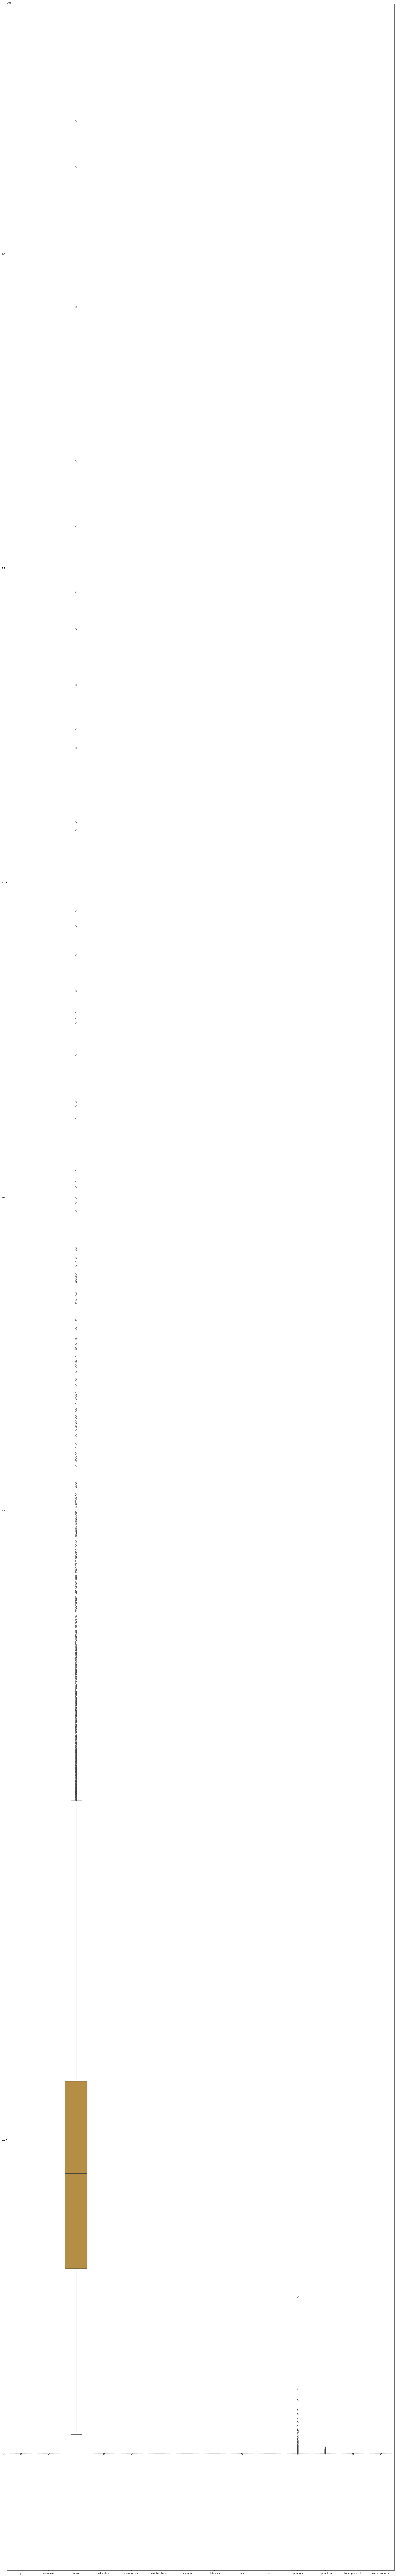

In [ ]:
plt.figure(figsize=(30,200))
sns.boxplot(data=x)

Removing Outliers

In [ ]:
for col in x.columns:
  if pd.api.types.is_numeric_dtype(x[col]):
    Q1=x[col].quantile(0.25)
    Q3=x[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    x=x[x[col].between(lower_bound,upper_bound)]
print(x)

       age  workclass  fnlwgt  education  education-num  marital-status  \
2       38          4  215646         11            9.0               0   
5       37          4  284582         12           14.0               2   
17      32          4  186824         11            9.0               4   
24      59          4  109015         11            9.0               0   
26      19          4  168294         11            9.0               4   
...    ...        ...     ...        ...            ...             ...   
32554   53          4  321865         12           14.0               2   
32555   22          4  310152         15           10.0               4   
32556   27          4  257302          7           12.0               2   
32557   40          4  154374         11            9.0               2   
32558   58          4  151910         11            9.0               6   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
2               5        

Boxplot after removing outliers

<Axes: >

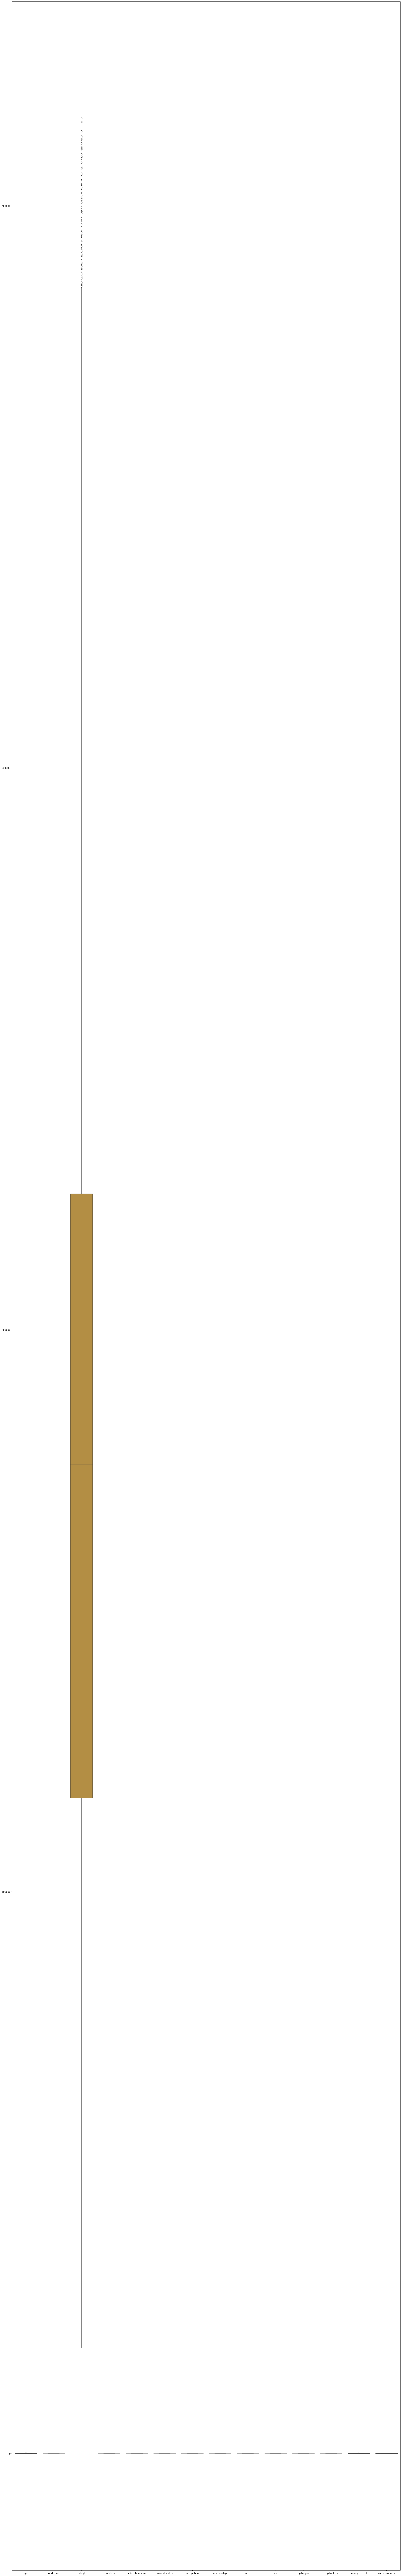

In [ ]:
plt.figure(figsize=(30,200))
sns.boxplot(data=x)

In [ ]:
x=df.iloc[:,:-1].values
x

array([[3.90000e+01, 7.00000e+00, 7.75160e+04, ..., 2.17400e+03,
        0.00000e+00, 4.00000e+01],
       [5.00000e+01, 6.00000e+00, 8.33110e+04, ..., 0.00000e+00,
        0.00000e+00, 1.30000e+01],
       [3.80000e+01, 4.00000e+00, 2.15646e+05, ..., 0.00000e+00,
        0.00000e+00, 4.00000e+01],
       ...,
       [5.80000e+01, 4.00000e+00, 1.51910e+05, ..., 0.00000e+00,
        0.00000e+00, 4.00000e+01],
       [2.20000e+01, 4.00000e+00, 2.01490e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+01],
       [5.20000e+01, 5.00000e+00, 2.87927e+05, ..., 1.50240e+04,
        0.00000e+00, 4.00000e+01]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 1])

Splitting Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[4.50000e+01, 4.00000e+00, 1.70871e+05, ..., 7.29800e+03,
        0.00000e+00, 6.00000e+01],
       [4.70000e+01, 7.00000e+00, 1.08890e+05, ..., 1.83100e+03,
        0.00000e+00, 3.80000e+01],
       [4.80000e+01, 4.00000e+00, 1.87505e+05, ..., 0.00000e+00,
        0.00000e+00, 5.00000e+01],
       ...,
       [2.30000e+01, 4.00000e+00, 4.53170e+04, ..., 0.00000e+00,
        0.00000e+00, 4.00000e+01],
       [4.50000e+01, 1.00000e+00, 2.15862e+05, ..., 7.68800e+03,
        0.00000e+00, 4.50000e+01],
       [2.50000e+01, 4.00000e+00, 1.86925e+05, ..., 2.59700e+03,
        0.00000e+00, 4.80000e+01]])

Normalization using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.38356164, 0.5       , 0.10770432, ..., 0.07298073, 0.        ,
        0.60204082],
       [0.4109589 , 0.875     , 0.06560968, ..., 0.01831018, 0.        ,
        0.37755102],
       [0.42465753, 0.5       , 0.11900137, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.08219178, 0.5       , 0.02243382, ..., 0.        , 0.        ,
        0.39795918],
       [0.38356164, 0.125     , 0.13826014, ..., 0.07688077, 0.        ,
        0.44897959],
       [0.10958904, 0.5       , 0.11860746, ..., 0.02597026, 0.        ,
        0.47959184]])

Model Creation using Multinomial Naive Bayes,SVC,KNeighbors CLassifier and Decision tree.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
n_model=MultinomialNB()
s_model=SVC()
knn=KNeighborsClassifier(n_neighbors=7)
d_tree=DecisionTreeClassifier(criterion='entropy')
lst_model=[n_model,s_model,knn,d_tree]

Checking with the accuracy score,recall,precision and F1 Score for each model.

In [ ]:
for i in lst_model:
  print('***********************')
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy Score..........")
  print(accuracy_score(y_test,y_pred))
  print("Recall Score......")
  print(recall_score(y_test,y_pred))
  print("Precision Score.........")
  print(precision_score(y_test,y_pred))
  print("F1 Score................")
  print(f1_score(y_test,y_pred))

***********************
Model name is MultinomialNB()
[[7406    1]
 [2318   44]]
Accuracy Score..........
0.7626164397584195
Recall Score......
0.018628281117696866
Precision Score.........
0.9777777777777777
F1 Score................
0.036560033236393855
***********************
Model name is SVC()
[[6953  454]
 [1056 1306]]
Accuracy Score..........
0.8454294195925888
Recall Score......
0.5529212531752752
Precision Score.........
0.7420454545454546
F1 Score................
0.633672974284328
***********************
Model name is KNeighborsClassifier(n_neighbors=7)
[[6760  647]
 [ 999 1363]]
Accuracy Score..........
0.8315078308936431
Recall Score......
0.5770533446232007
Precision Score.........
0.6781094527363184
F1 Score................
0.6235132662397072
***********************
Model name is DecisionTreeClassifier(criterion='entropy')
[[6461  946]
 [ 902 1460]]
Accuracy Score..........
0.8108301770907974
Recall Score......
0.6181202370872142
Precision Score.........
0.6068162926018288

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(random_state=42,n_estimators=100)
rnd.fit(x_train,y_train)
y_pred=rnd.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

[[6866  541]
 [ 881 1481]]
Accuracy Score :  0.8544375063977889
Recall :  0.6270110076206604
Precision :  0.7324431256181998
F1 Score :  0.6756386861313868


Hyper parameter Tuning using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,7,10,15],
        'min_samples_leaf':[3,5,10,15,20],
        'min_samples_split':[8,10,12,18,20,16],
        'criterion':['gini','entropy']}
grdcv=GridSearchCV(d_tree,params,cv=10,scoring='accuracy')
grdcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy')

Checking with the best Parameters after tuning

In [ ]:
print(grdcv.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 18}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=20,min_samples_split=8)
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Checking Accuracy Score, Precision, Recall and F1 Score after tuning for Decision Tree model

In [ ]:
cmd=confusion_matrix(y_test,y_pred)
cmd
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy Score :  0.8553587880028662
Precision : 0.7839616995810892
Recall :  0.554614733276884
F1 Score :  0.6496404661542277


In [ ]:
df.dtypes

age                 int64
workclass           int64
fnlwgt              int64
education           int64
education-num     float64
marital-status      int64
occupation          int64
relationship        int64
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week    float64
income              int64
dtype: object

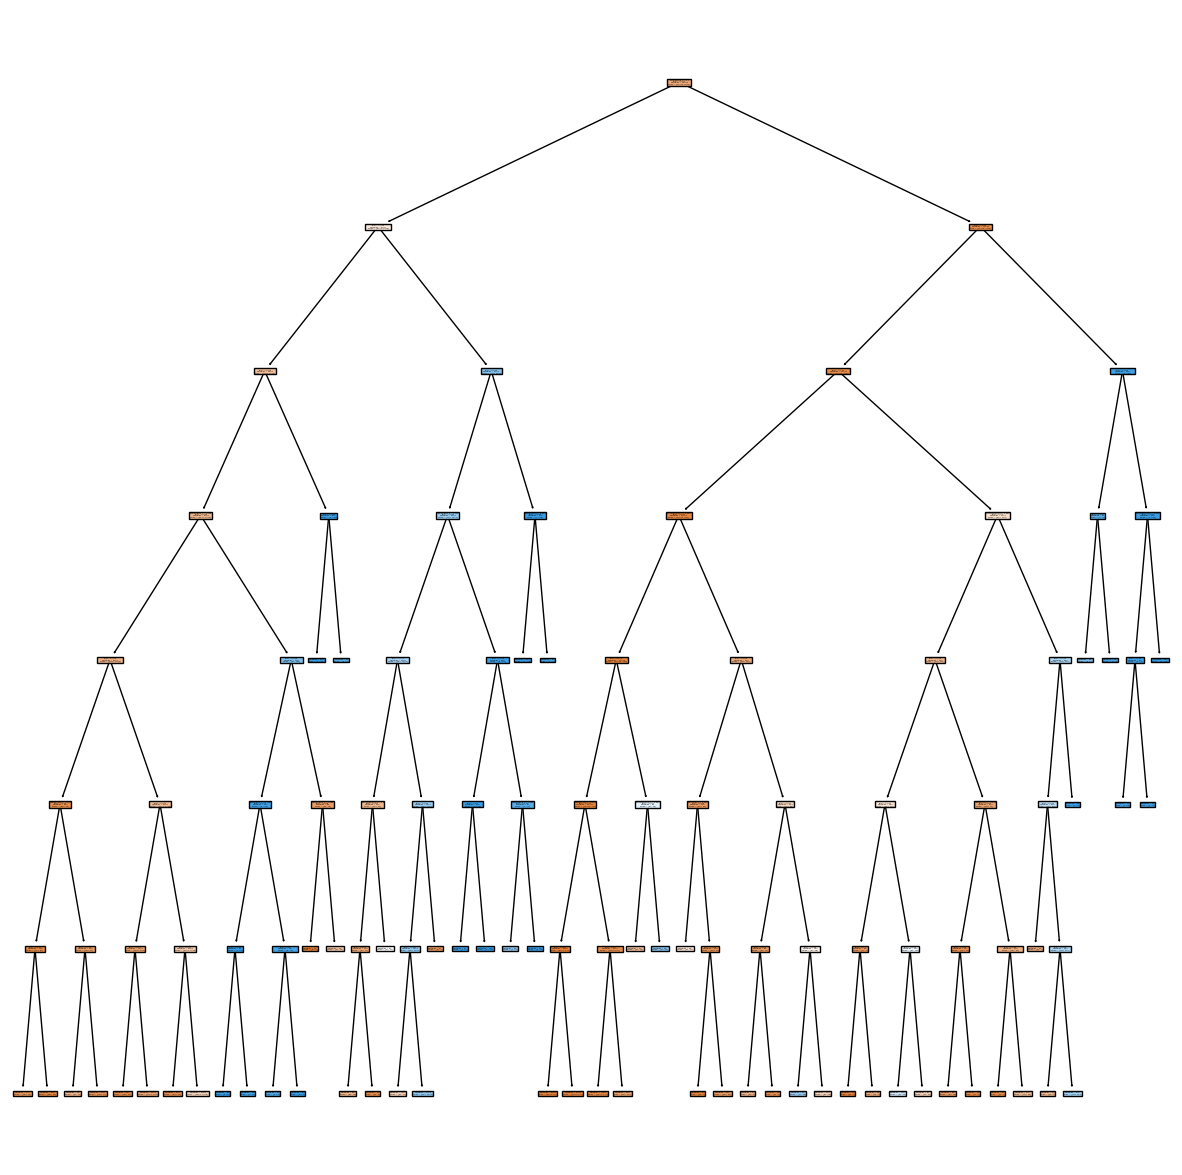

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(d_tree,feature_names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country'],filled=True)
plt.show()